# Train and evaluate models

This notebooks shows how to train, predict and cluster models. Alternatively to executing each step here, the cli can be used for training models:
`python train.py all --config params/example_experiment_params.py`

TODO: more detailled explanation of model classes?
TODO: add more info on each of the presented classes

In [1]:
import logging
logging.basicConfig(level=logging.INFO)

from miann.tl import Experiment, Predictor, Estimator, Cluster, ModelComparator
from miann.constants import get_data_config, EXPERIMENT_DIR

data_config = get_data_config('NascentRNA')
print(EXPERIMENT_DIR)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new


## Experiment class handles config files
For training and evaluating models, an experiment_params file is used. This file contains several model/experiment parameters for easy training of several models at the same time. The parameter dictionaries contain several sections:
- experiment (where to save experiment)
- data (which dataset to use for training)
- model (model class definition)
- training (training hyperparameters)
- evaluation (evaluation on val/test split)
- cluster (clustering on val/test split)

The Experiment class is initialised from a parameter dictionary for one specific experiment and is passed to specific classes for training, evaluation, and clustering.

In [6]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("params/example_experiment_params.py")

# in the following, choose one experiment, and train
exp = exps[1]
exp.config

INFO:Experiment:Setting up experiment test/VAE
INFO:Experiment:Saving config to test/VAE/config.json
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Saving config to test/CondVAE_pert-CC/config.json


{'experiment': {'dir': 'test', 'name': 'CondVAE_pert-CC', 'save_config': True},
 'data': {'data_config': 'NascentRNA',
  'dataset_name': '184A1_test_dataset',
  'output_channels': None},
 'model': {'model_cls': <ModelEnum.VAEModel: 'VAEModel'>,
  'model_kwargs': {'num_neighbors': 3,
   'num_channels': 34,
   'num_output_channels': 34,
   'latent_dim': 16,
   'encoder_conv_layers': [32],
   'encoder_conv_kernel_size': [1],
   'encoder_fc_layers': [32, 16],
   'decoder_fc_layers': [],
   'num_conditions': 14,
   'encode_condition': [10, 10]},
  'init_with_weights': False},
 'training': {'learning_rate': 0.001,
  'epochs': 10,
  'batch_size': 128,
  'loss': {'decoder': <LossEnum.SIGMA_MSE: 'sigma_vae_mse'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'loss_weights': {'decoder': 1},
  'loss_warmup_to_epoch': {},
  'metrics': {'decoder': <LossEnum.MSE_metric: 'mean_squared_error_metric'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'save_model_weights': True,
  'save_history': True,

## NN training and prediction with Estimator
The Estimator handles model setup, training, and prediction


In [60]:
est = Estimator(exp)

INFO:VAEModel:Creating model
INFO:MPPData:Created new: MPPData for NascentRNA (246467 mpps with shape (3, 3, 34) from 1768 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (14231 mpps with shape (3, 3, 34) from 101 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for NascentRNA (1184845 mpps with shape (1, 1

In [61]:
est.train_model()

INFO:Estimator:Training model for 10 epochs


Epoch 1/10


2021-11-09 13:03:06.825310: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1926/1926 [==============================] - 42s 20ms/step - loss: -2018.3251 - decoder_loss: -2026.0433 - latent_loss: 7.7160 - decoder_mean_squared_error: 0.0351 - latent_kl_loss: 7.7159 - val_loss: -2626.3799 - val_decoder_loss: -2633.9451 - val_latent_loss: 7.5660 - val_decoder_mean_squared_error: 0.0175 - val_latent_kl_loss: 7.5673
Epoch 2/10
1926/1926 [==============================] - 38s 19ms/step - loss: -2676.3843 - decoder_loss: -2683.7822 - latent_loss: 7.3988 - decoder_mean_squared_error: 0.0172 - latent_kl_loss: 7.3989 - val_loss: -2793.7539 - val_decoder_loss: -2801.2937 - val_latent_loss: 7.5390 - val_decoder_mean_squared_error: 0.0162 - val_latent_kl_loss: 7.5402
Epoch 3/10
1926/1926 [==============================] - 39s 19ms/step - loss: -2761.4021 - decoder_loss: -2768.6797 - latent_loss: 7.2823 - decoder_mean_squared_error: 0.0166 - latent_kl_loss: 7.2823 - val_loss: -2841.6174 - val_decoder_loss: -2848.9336 - val_latent_loss: 7.3155 - val_decoder_mean_squared_erro

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010


,loss,decoder_loss,latent_loss,decoder_mean_squared_error,latent_kl_loss,val_loss,val_decoder_loss,val_latent_loss,val_decoder_mean_squared_error,val_latent_kl_loss
epoch,,,,,,,,,,
0,-2018.325073,-2026.043335,7.715993,0.035076,7.715890,-2626.379883,-2633.945068,7.566003,0.017501,7.567288
1,-2676.384277,-2683.782227,7.398828,0.017220,7.398917,-2793.753906,-2801.293701,7.538978,0.016158,7.540212
2,-2761.402100,-2768.679688,7.282348,0.016572,7.282305,-2841.617432,-2848.933594,7.315463,0.015808,7.316494
3,-2797.395508,-2804.430420,7.036362,0.016312,7.036388,-2900.728516,-2907.786865,7.059549,0.015385,7.060273
4,-2932.056641,-2938.991211,6.934827,0.015344,6.934825,-3013.439453,-3020.273682,6.834008,0.014609,6.834626
5,-2965.014404,-2971.784424,6.767159,0.015086,6.767106,-3016.380127,-3022.991455,6.610498,0.014594,6.610941
6,-2973.147217,-2979.737305,6.594448,0.015024,6.594365,-3026.804443,-3033.335693,6.531683,0.014526,6.531979
7,-2975.631836,-2982.064697,6.430381,0.015001,6.430285,-3031.956787,-3038.343262,6.386096,0.014494,6.386297
8,-2976.990723,-2983.285889,6.291120,0.014992,6.291092,-3028.191406,-3034.460205,6.267705,0.014520,6.267830


## Predict val split and images with Predictor

In [62]:
pred = Predictor(exp)

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (246467 mpps with shape (3, 3, 34) from 1768 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (14231 mpps with shape (3, 3, 34) from 101 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'c

In [63]:
pred.evaluate_model()

INFO:Predictor:Predicting split val for test/CondVAE_pert-CC
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['obj_ids', 'x', 'decoder', 'y', 'latent'])
INFO:Predictor:Predicting split val_imgs for test/CondVAE_pert-CC
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Adding neighborhood of size 3
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs (keys: ['obj_ids', 'x', 'decoder', 'y', 'latent'])


## Cluster resulting latent space with Cluster

In [7]:
cl = Cluster.from_exp_split(exp)

INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 88 objects


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].


MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].


In [8]:
cl.create_clustering()

INFO:Cluster:Creating leiden clustering
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['obj_ids', 'y', 'umap', 'clustering', 'x'])


In [68]:
# predict cluster images
_ = cl.predict_cluster_imgs(exp)

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (246467 mpps with shape (3, 3, 34) from 1768 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_data/NascentRNA_new/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (14231 mpps with shape (3, 3, 34) from 101 objects). Data keys: ['x', 'y', 'mpp', 'obj_ids', 'labels', 'c

## Plot results using ModelComparator

In [2]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir('test')
comp = ModelComparator(exps)

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/MPPleiden
INFO:Experiment:Initialised from existing experiment in test/MPPleiden
INFO:Experiment:Setting up experiment test/VAE
INFO:Experiment:Initialised from existing experiment in test/VAE
INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 88 objects


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'decoder']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:MPPData:Created new: MPPData for NascentRNA (11848 mpps with shape (3, 3, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 88 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'decoder']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val, with base data from datasets/184A1_test_dataset/val


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val/clustering.npy


INFO:MPPData:Created new: MPPData for NascentRNA (1184845 mpps with shape (1, 1, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'decoder']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs, with base data from datasets/184A1_test_dataset/val_imgs
INFO:MPPData:Created new: MPPData for NascentRNA (1184845 mpps with shape (1, 1, 34) from 88 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Before subsetting: 88 objects
INFO:MPPData:Subsetting to 5 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'decoder']
INFO:MPPData

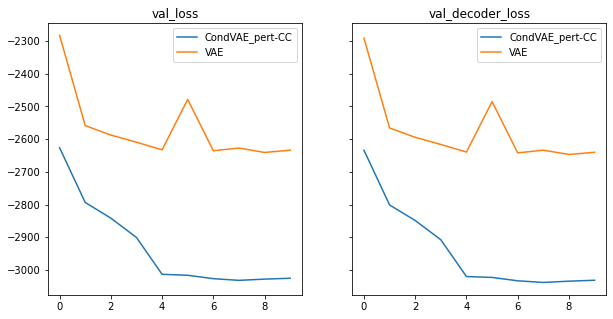

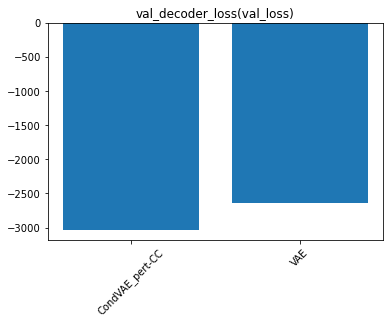

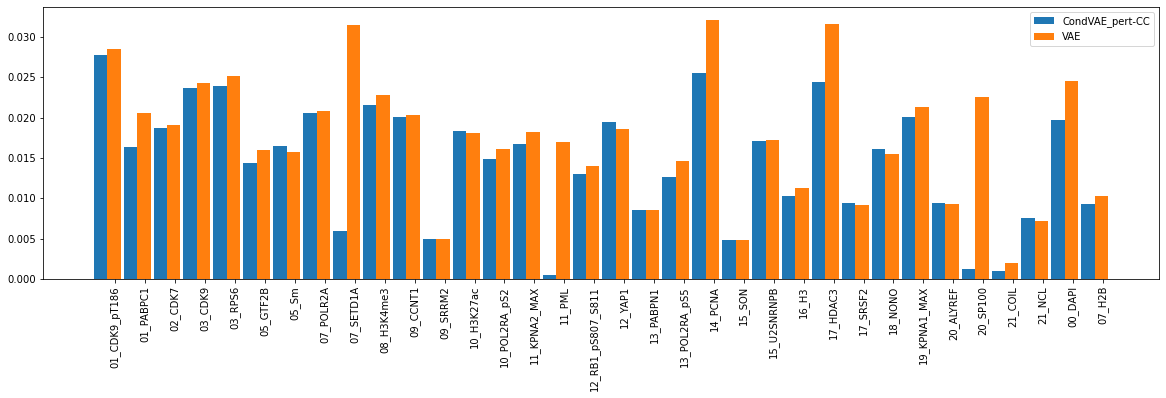

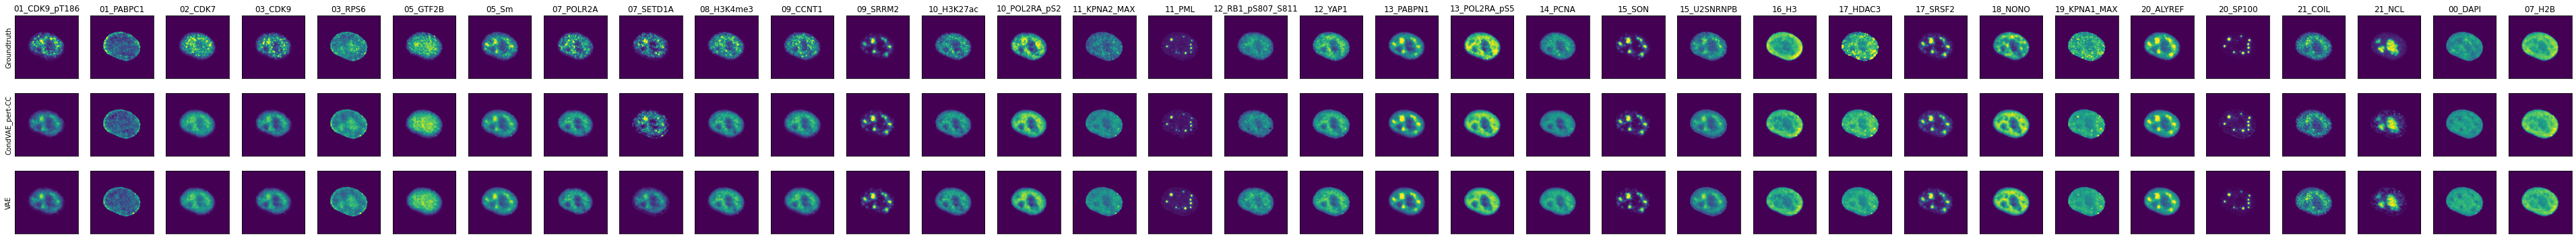

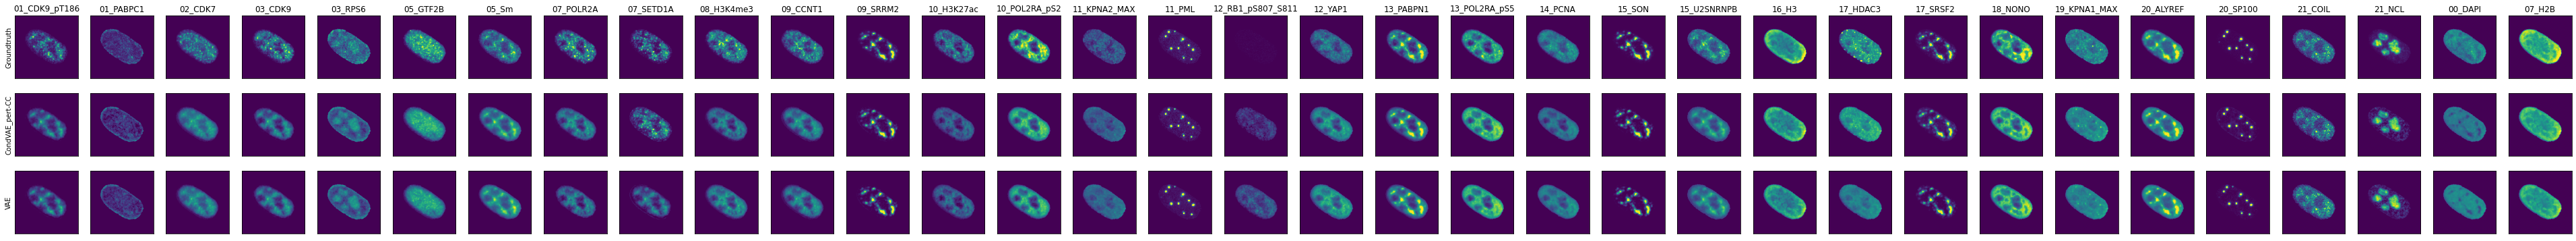

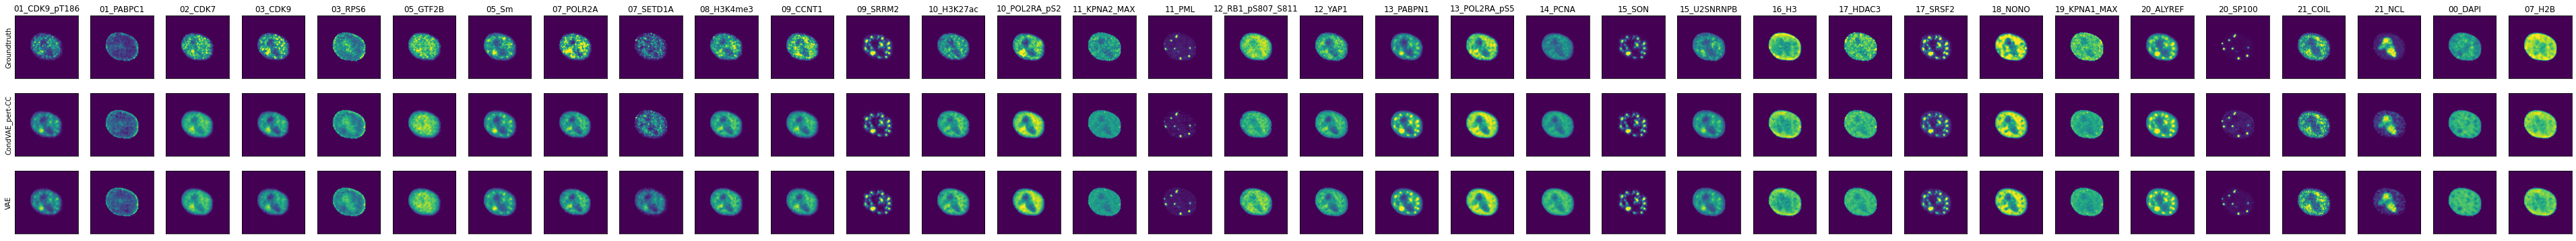

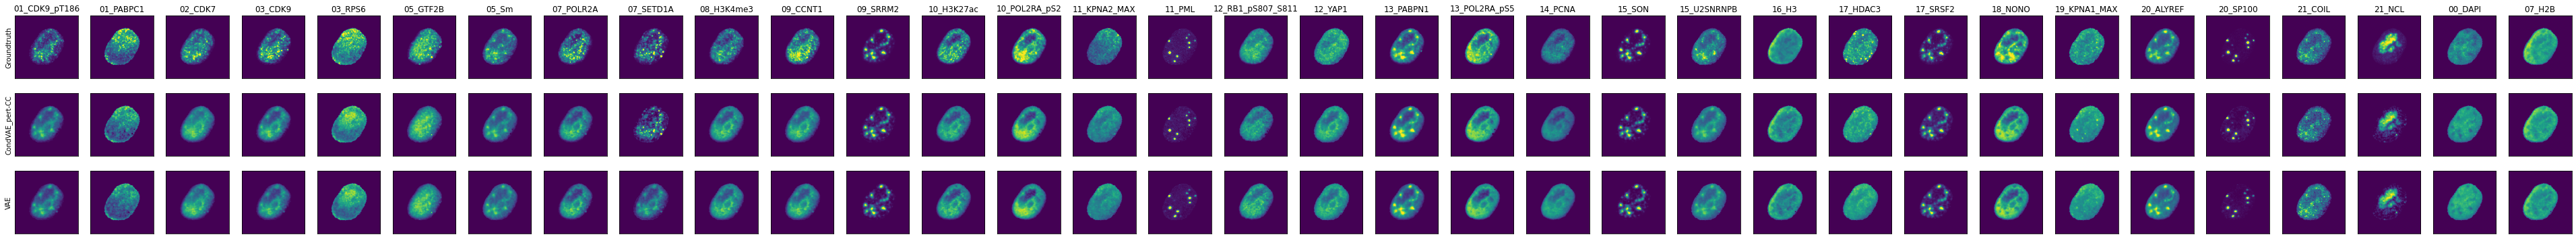

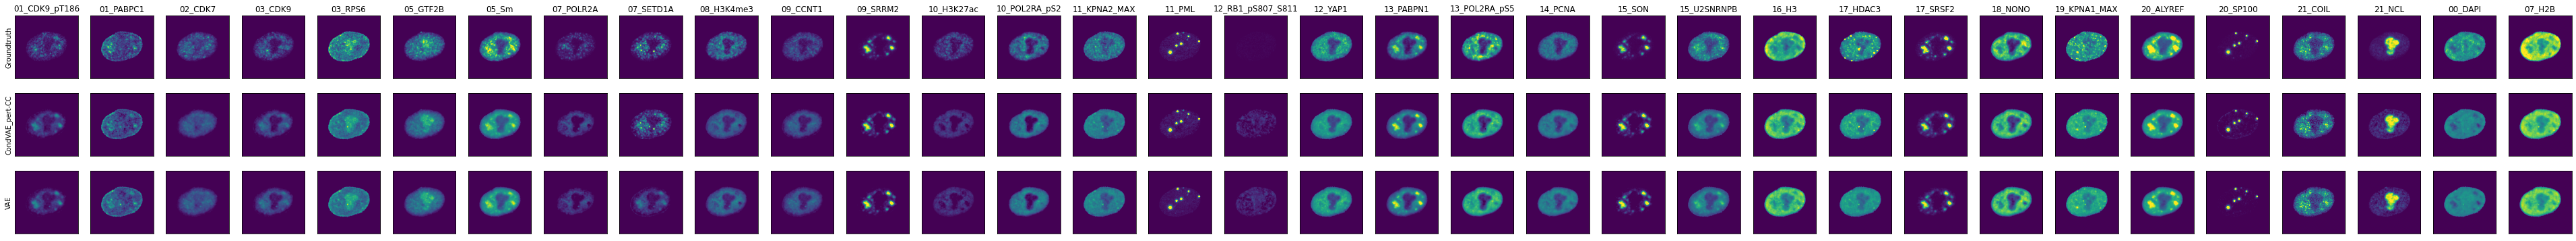

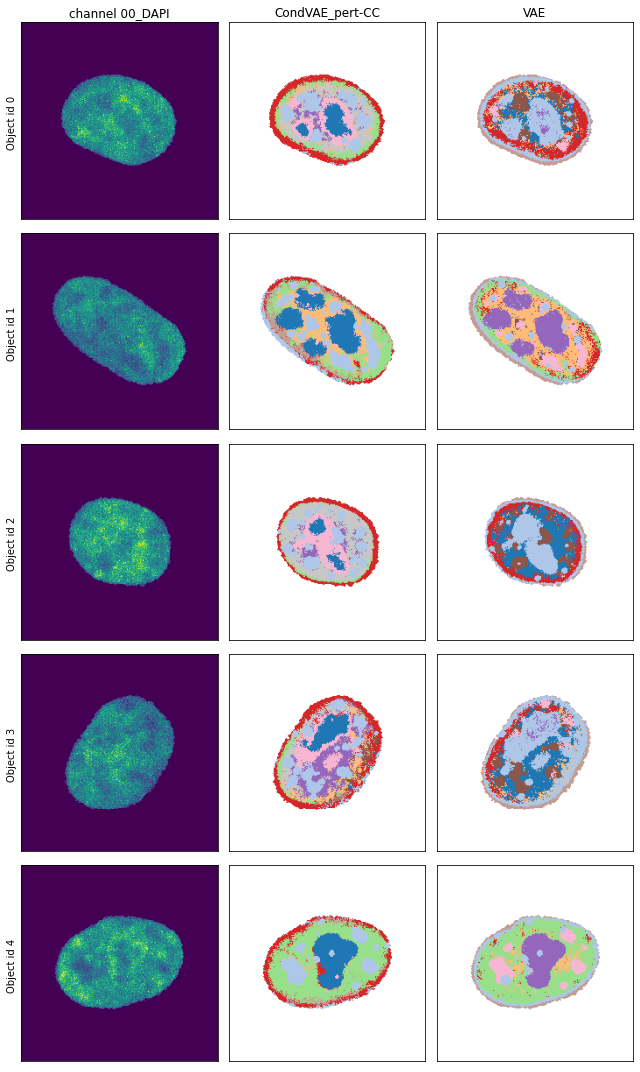

In [3]:
comp.plot_history(values=['val_loss', 'val_decoder_loss'])
comp.plot_final_score(score='val_decoder_loss', fallback_score='val_loss', save_prefix='decoder_loss_')
comp.plot_per_channel_mse()
comp.plot_predicted_images(img_ids=[0,1,2,3,4], img_size=225)
comp.plot_cluster_images(img_ids=[0,1,2,3,4], img_size=225)